## Context
A major proportion of retail bank profit comes from interests in the form of home loans. These loans are borrowed by regular income/high-earning customers. Banks are most fearful of defaulters, as bad loans (NPA) usually eat up a major chunk of their profits. Therefore, it is important for banks to be judicious while approving loans for their customer base.

The approval process for the loans is multifaceted. Through this process, the bank tries to check the creditworthiness of the applicant on the basis of a manual study of various aspects of the application. The entire process is not only effort-intensive but also prone to wrong judgment/approval owing to human error and biases. There have been attempts by many banks to automate this process by using heuristics. But with the advent of data science and machine learning, the focus has shifted to building machines that can learn this approval process and make it free of biases and more efficient. At the same time, one
important thing to keep in mind is to make sure that the machine does not learn the biases that previously crept in because of the human approval process.

### Problem Statement
A bank's consumer credit department aims to simplify the decision-making process for home equity lines of credit to be accepted. To do this, they will adopt the Equal Credit Opportunity Act's guidelines to establish an empirically derived and statistically sound model for credit scoring. The model will be based on the data obtained via the existing loan underwriting process from recent applicants who have been given credit. The model will be built from predictive modeling techniques, but the model created must be interpretable enough to provide a justification for any adverse behavior (rejections).

## Objective
Build a classification model to predict clients who are likely to default on their loan and give
recommendations to the bank on the important features to consider while approving a loan.

## Data Dictionary
The Home Equity dataset (HMEQ) contains baseline and loan performance information for recent
home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has
ultimately defaulted or has been severely delinquent. There are 12 input variables registered for each
applicant.
* BAD: 1 = Client defaulted on loan, 0 = loan repaid
* LOAN: Amount of loan approved
* MORTDUE: Amount due on the existing mortgage
* VALUE: Current value of the property
* REASON: Reason for the loan request (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer
debts)
* JOB: The type of job that loan applicant has such as manager, self, etc.
* YOJ: Years at present job
* DEROG: Number of major derogatory reports (which indicates serious delinquency or late payments).
* DELINQ: Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on
which the payments were due)
* CLAGE: Age of the oldest credit line in months
* NINQ: Number of recent credit inquiries
* CLNO: Number of existing credit lines
* DEBTINC: Debt-to-income ratio (all monthly debt payments divided by gross monthly income. This number is one of the ways lenders measure a borrower’s ability to manage the monthly payments to repay the money they plan to borrow)

## **Importing the necessary libraries and overview of the dataset**

In [101]:
import warnings
warnings.filterwarnings("ignore")

# Libraries for data manipulation and visualization
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, f1_score

from sklearn import metrics

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV

### **Loading the data**

In [102]:
default = pd.read_csv("hmeq.csv")

In [103]:
# Copying data to another variable to avoid any changes to original data
data = default.copy()

### **View the first and the last 5 rows of the dataset**

In [104]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [105]:
data.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


### **Checking the info of the data**

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


* The dataset has **5,960 rows and 13 columns**. 

* `REASON` and `JOB`are of **object type** while the rest of the columns are numeric in nature.

* There are **null values** in the dataset and will need to be cleaned up.

* **BAD column is the decision varible that we want to understand.

In [107]:
data.dropna(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3364 entries, 5 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      3364 non-null   int64  
 1   LOAN     3364 non-null   int64  
 2   MORTDUE  3364 non-null   float64
 3   VALUE    3364 non-null   float64
 4   REASON   3364 non-null   object 
 5   JOB      3364 non-null   object 
 6   YOJ      3364 non-null   float64
 7   DEROG    3364 non-null   float64
 8   DELINQ   3364 non-null   float64
 9   CLAGE    3364 non-null   float64
 10  NINQ     3364 non-null   float64
 11  CLNO     3364 non-null   float64
 12  DEBTINC  3364 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 367.9+ KB


**Observations:**
- We can see that **all the columns are filled with non null values**. We can now perform our classifying model

## **Exploratory Data Analysis and Data Preprocessing**

In [108]:
# Selecting numerical columns and checking the summary statistics
num_cols = data.select_dtypes('number').columns

data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,3364.0,0.089180,0.285045,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,3364.0,19154.399524,10875.418447,1700.000000,12000.000000,17000.000000,23825.000000,89900.000000
MORTDUE,3364.0,76249.621581,45095.372690,5076.000000,49351.250000,67278.500000,92986.750000,399412.000000
VALUE,3364.0,107501.385850,54728.240086,21144.000000,71235.000000,94453.500000,122339.250000,512650.000000
YOJ,3364.0,9.110285,7.596541,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,3364.0,0.146849,0.579524,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,3364.0,0.278835,0.809631,0.000000,0.000000,0.000000,0.000000,10.000000
CLAGE,3364.0,180.993684,82.769271,0.486711,118.687903,176.742048,230.402191,1168.233561
NINQ,3364.0,1.037455,1.549777,0.000000,0.000000,1.000000,2.000000,13.000000
CLNO,3364.0,22.114150,9.387330,0.000000,16.000000,21.000000,27.000000,64.000000


### **Checking the distribution and outliers for numerical columns in the data**

LOAN
Skew : 2.17


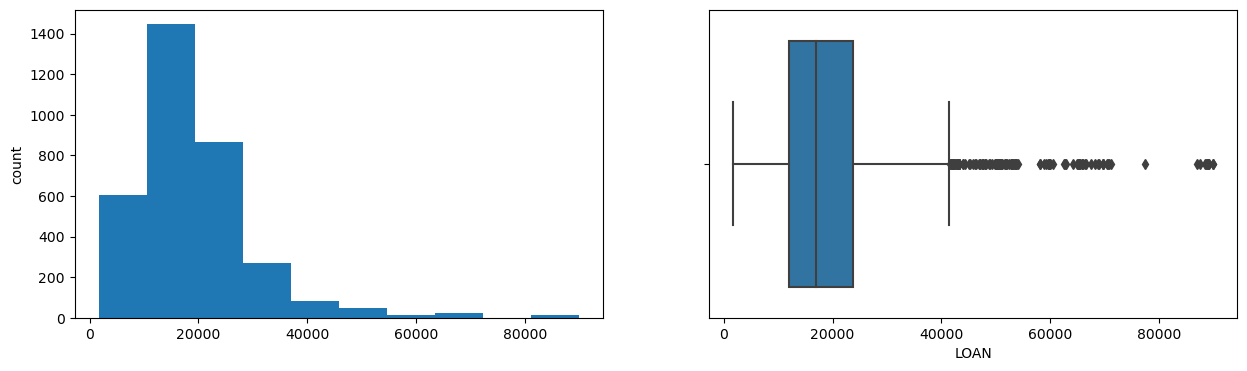

MORTDUE
Skew : 1.93


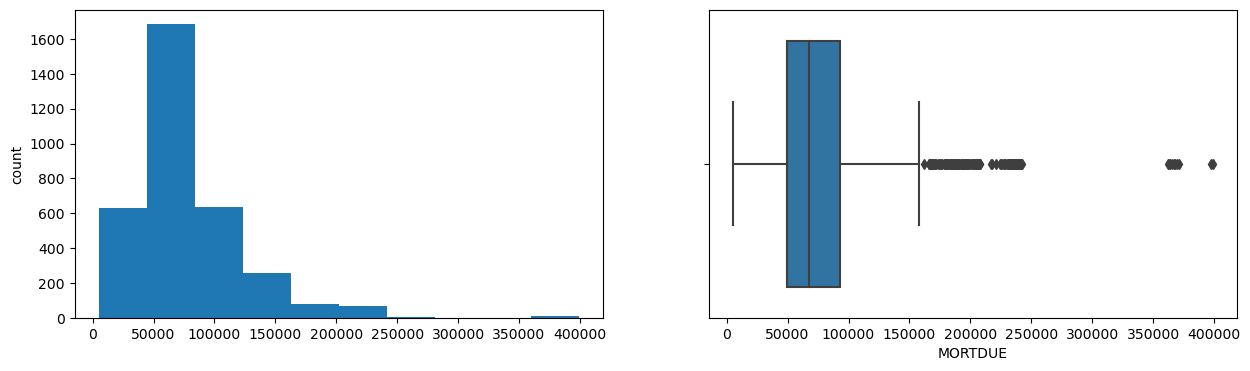

VALUE
Skew : 2.05


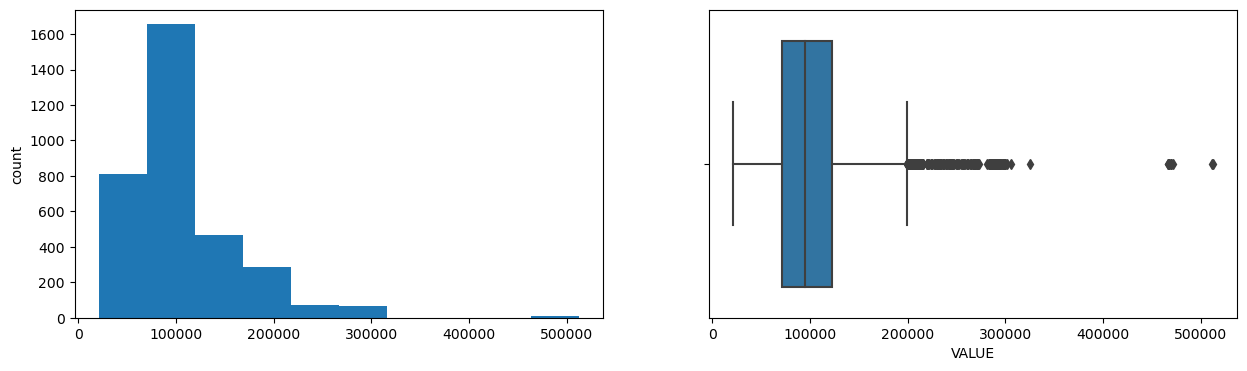

YOJ
Skew : 0.91


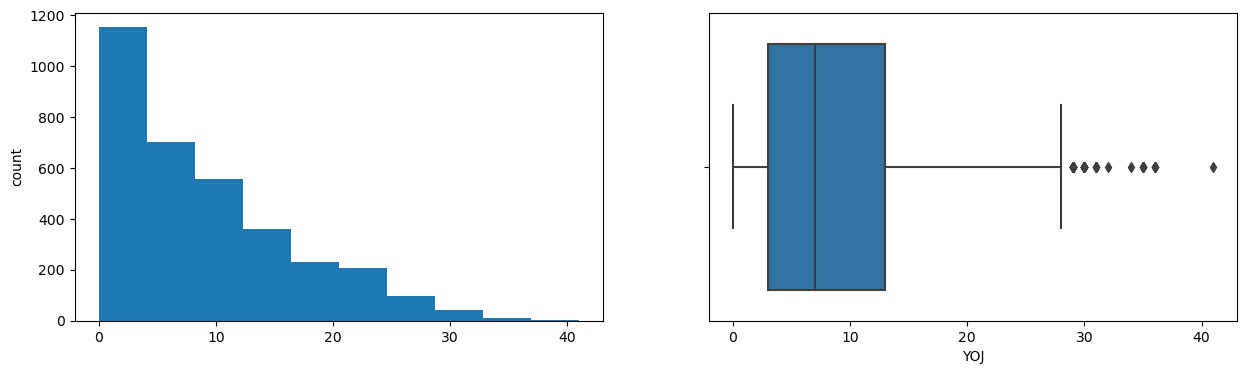

DEROG
Skew : 7.02


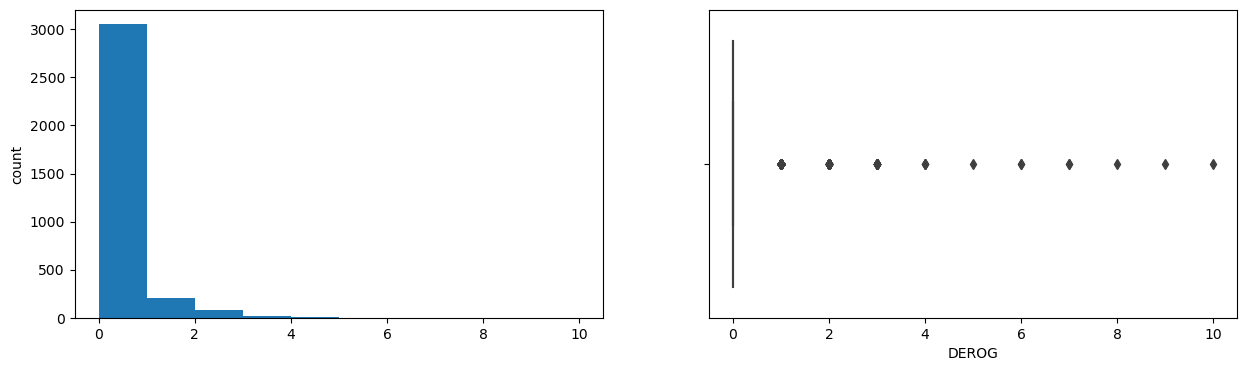

DELINQ
Skew : 4.44


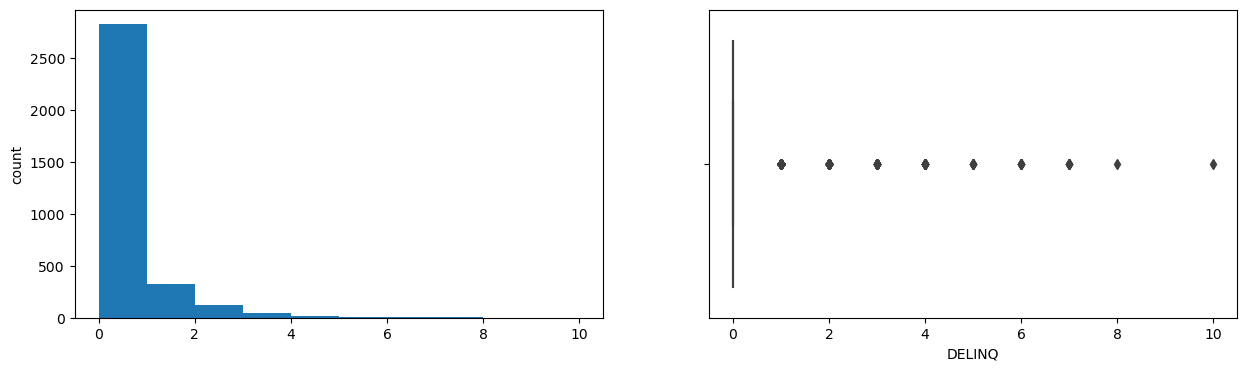

CLAGE
Skew : 1.52


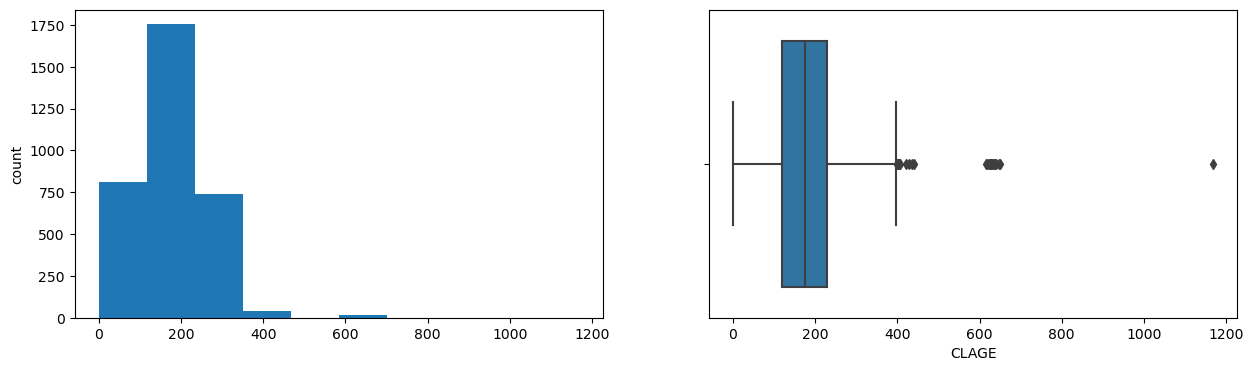

NINQ
Skew : 2.68


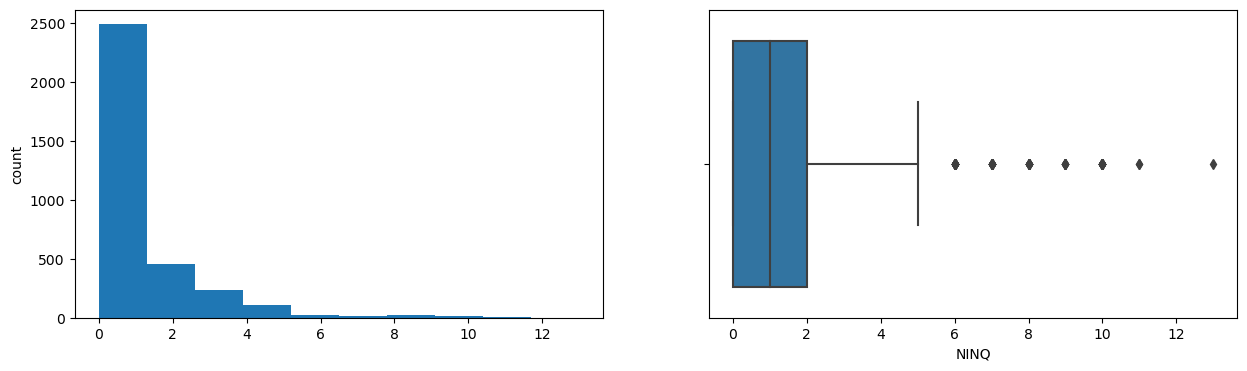

CLNO
Skew : 0.8


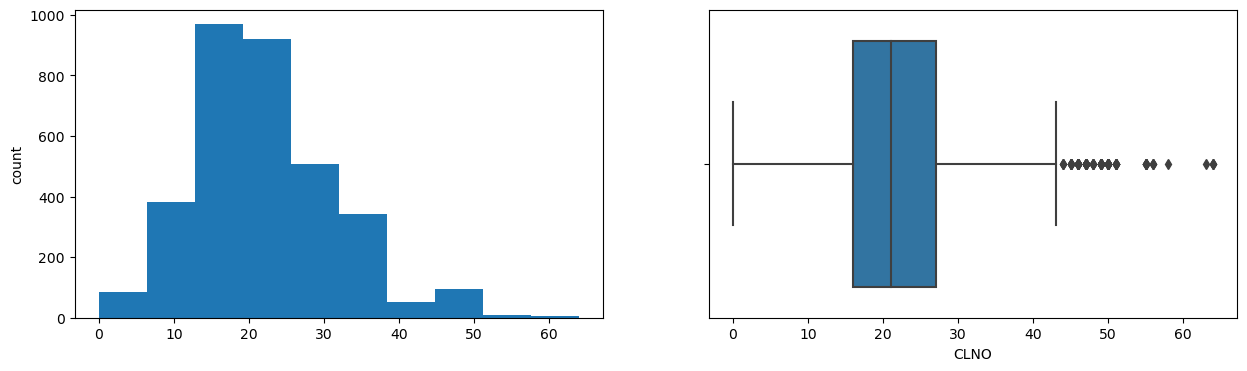

DEBTINC
Skew : 1.85


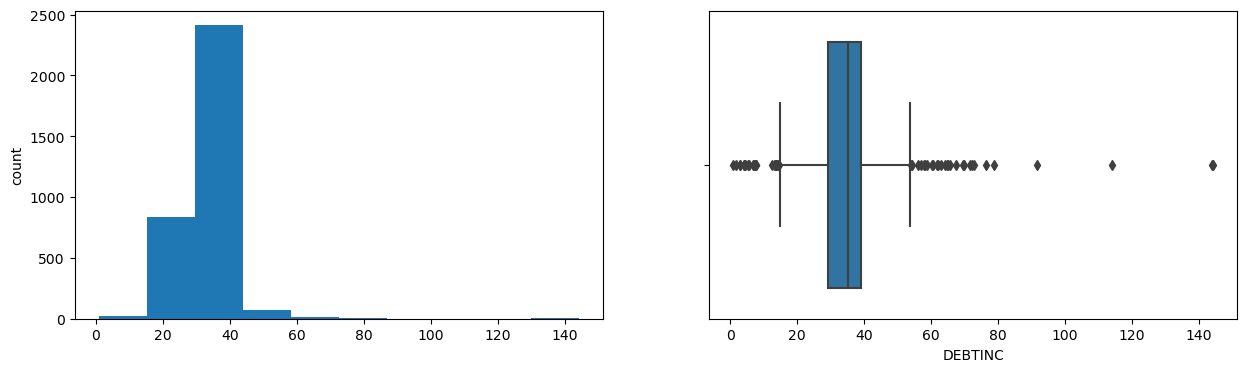

In [109]:
for col in ['LOAN', 'MORTDUE', 'VALUE', 'YOJ',
           'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO',
           'DEBTINC']:
    print(col)
    
    print('Skew :', round(data[col].skew(), 2))
    
    plt.figure(figsize = (15, 4))
    
    plt.subplot(1,2,1)
    
    data[col].hist(bins = 10, grid = False)
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = data[col])
    
    plt.show()

In [110]:
cat_cols = ['BAD', 'REASON', 'JOB']

for col in cat_cols:    
    print(data[col].value_counts(normalize = True))  # The parameter normalize = True gives the percentage of each category
    print('*'*40)  

0    0.91082
1    0.08918
Name: BAD, dtype: float64
****************************************
DebtCon    0.704221
HomeImp    0.295779
Name: REASON, dtype: float64
****************************************
Other      0.382283
ProfExe    0.267241
Office     0.171522
Mgr        0.133769
Self       0.029429
Sales      0.015755
Name: JOB, dtype: float64
****************************************


**We are done with univariate analysis and data preprocessing. Let's explore the data a bit more with bivariate analysis.**

**Numerical Variables**

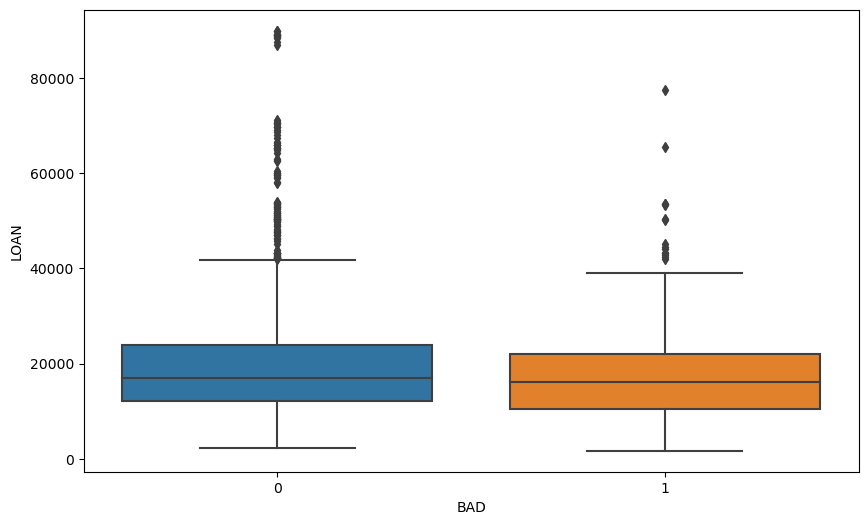

In [111]:
plt.figure(figsize = (10, 6))

sns.boxplot(data = data, x = "BAD", y = "LOAN")

plt.show()

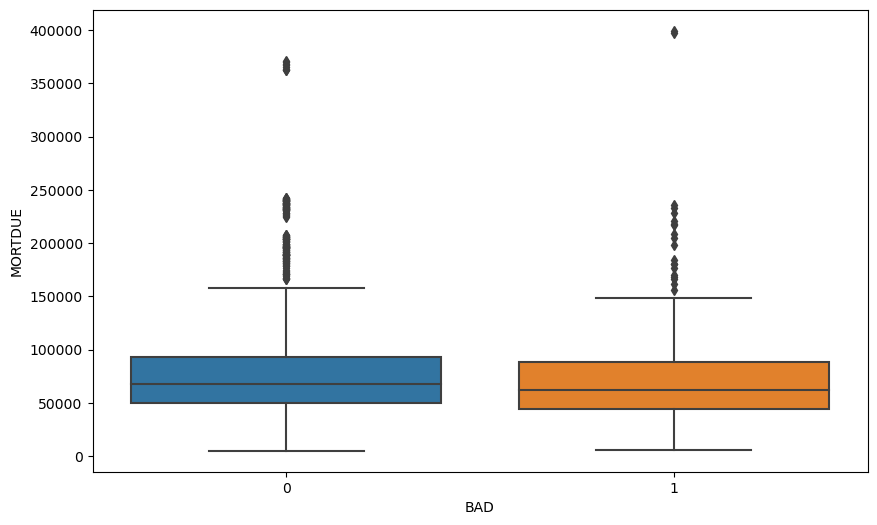

In [112]:
plt.figure(figsize = (10, 6))

sns.boxplot(data = data, x = "BAD", y = "MORTDUE")

plt.show()

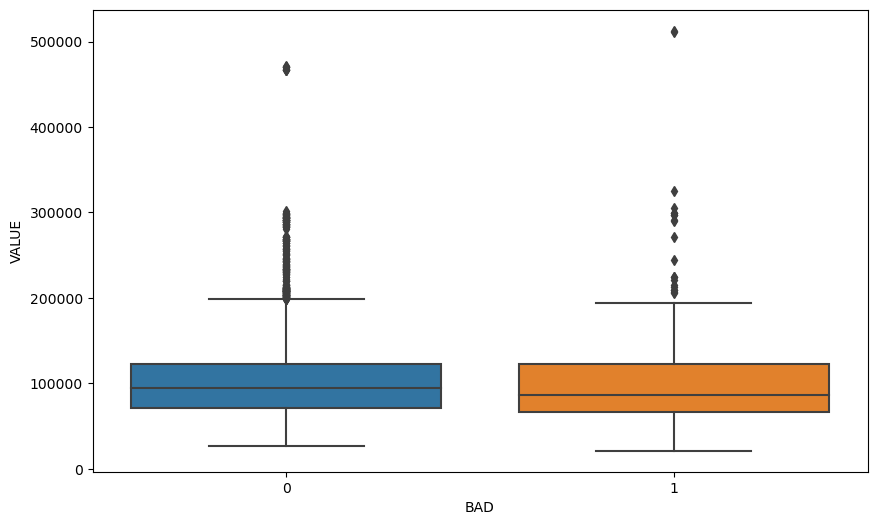

In [113]:
plt.figure(figsize = (10, 6))

sns.boxplot(data = data, x = "BAD", y = "VALUE")

plt.show()

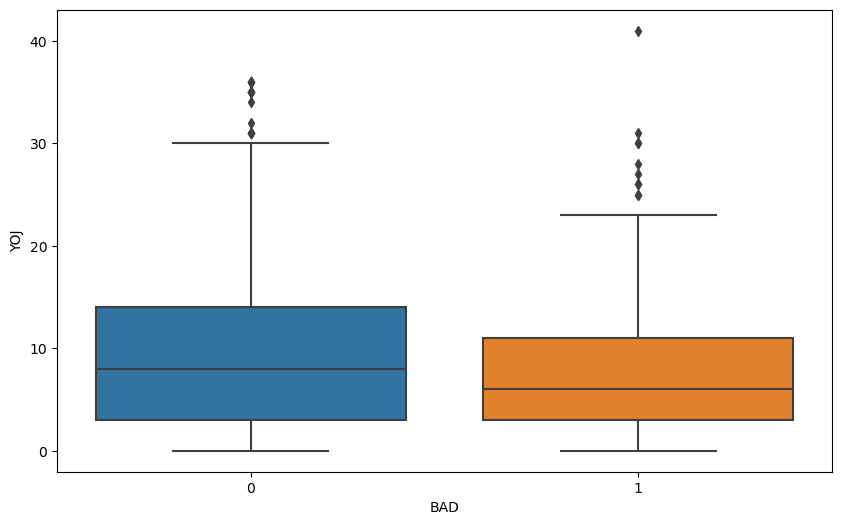

In [114]:
plt.figure(figsize = (10, 6))

sns.boxplot(data = data, x = "BAD", y = "YOJ")

plt.show()

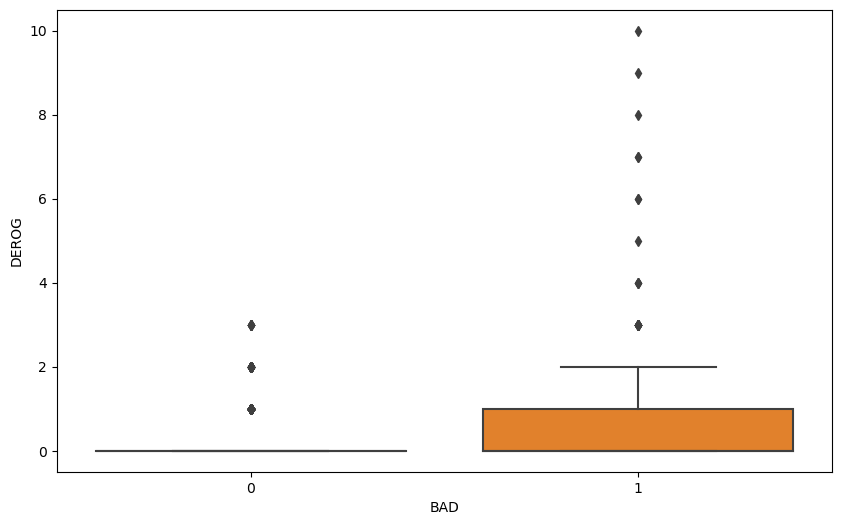

In [115]:
plt.figure(figsize = (10, 6))

sns.boxplot(data = data, x = "BAD", y = "DEROG")

plt.show()

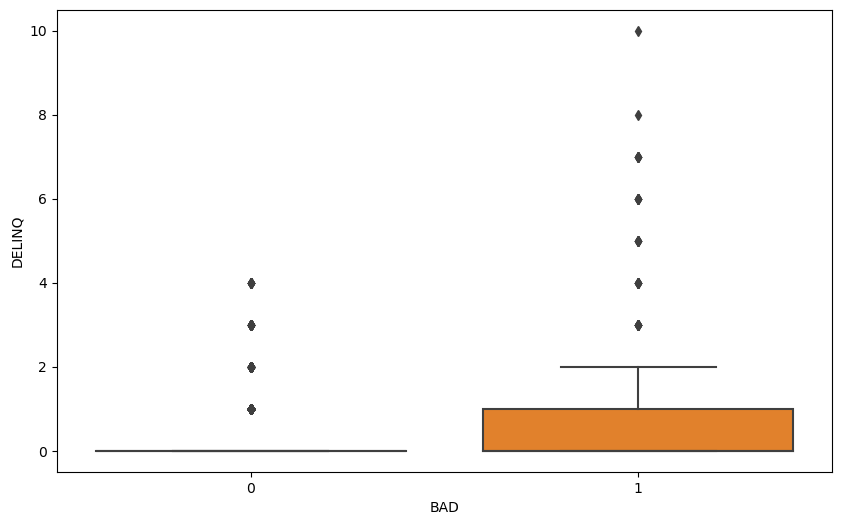

In [116]:
plt.figure(figsize = (10, 6))

sns.boxplot(data = data, x = "BAD", y = "DELINQ")

plt.show()

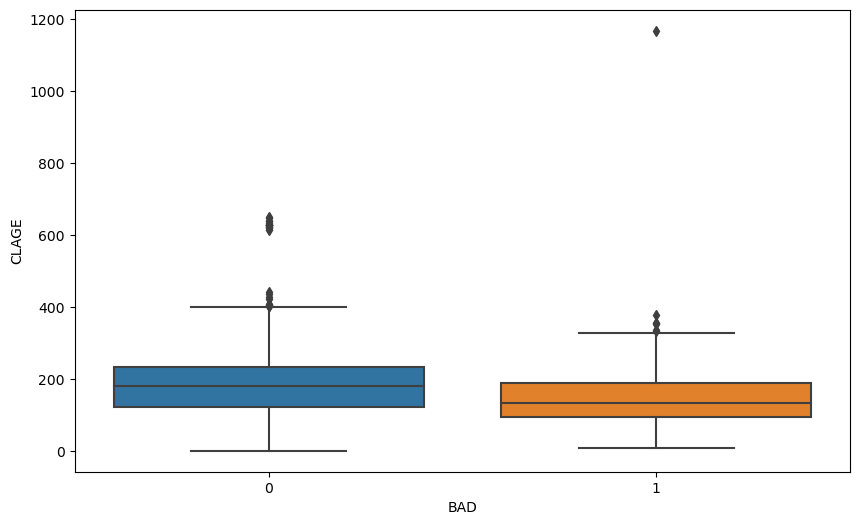

In [117]:
plt.figure(figsize = (10, 6))

sns.boxplot(data = data, x = "BAD", y = "CLAGE")

plt.show()

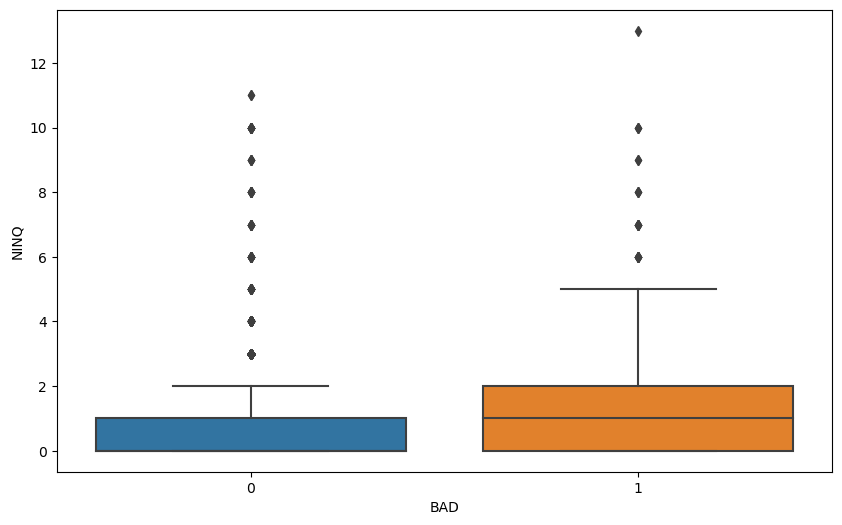

In [118]:
plt.figure(figsize = (10, 6))

sns.boxplot(data = data, x = "BAD", y = "NINQ")

plt.show()

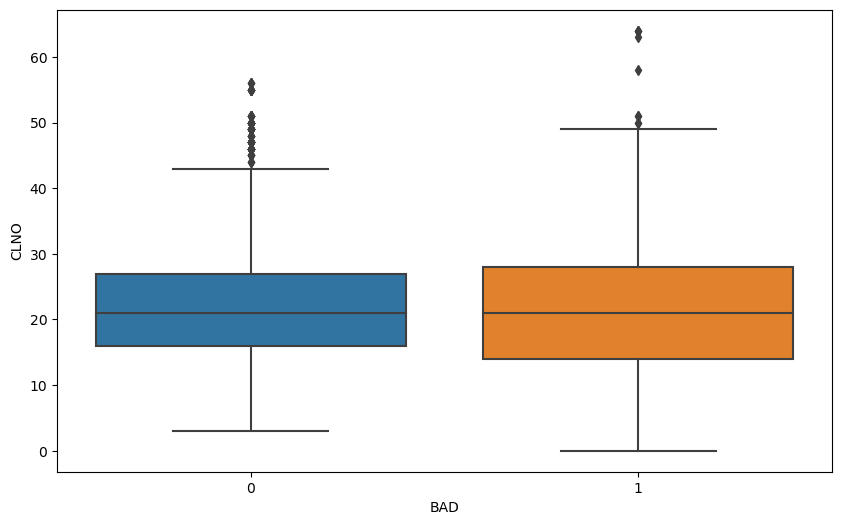

In [119]:
plt.figure(figsize = (10, 6))

sns.boxplot(data = data, x = "BAD", y = "CLNO")

plt.show()

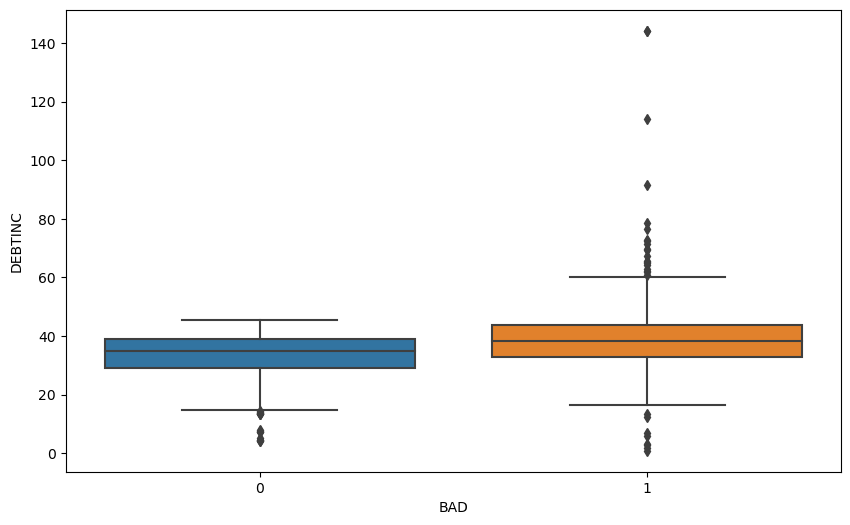

In [120]:
plt.figure(figsize = (10, 6))

sns.boxplot(data = data, x = "BAD", y = "DEBTINC")

plt.show()

**Categorical Variables**

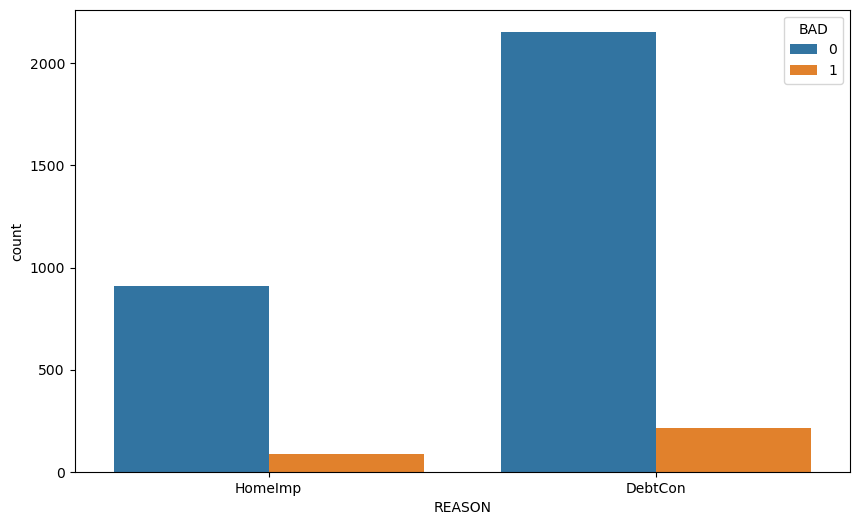

In [121]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'REASON', hue = 'BAD', data = data)

plt.show()

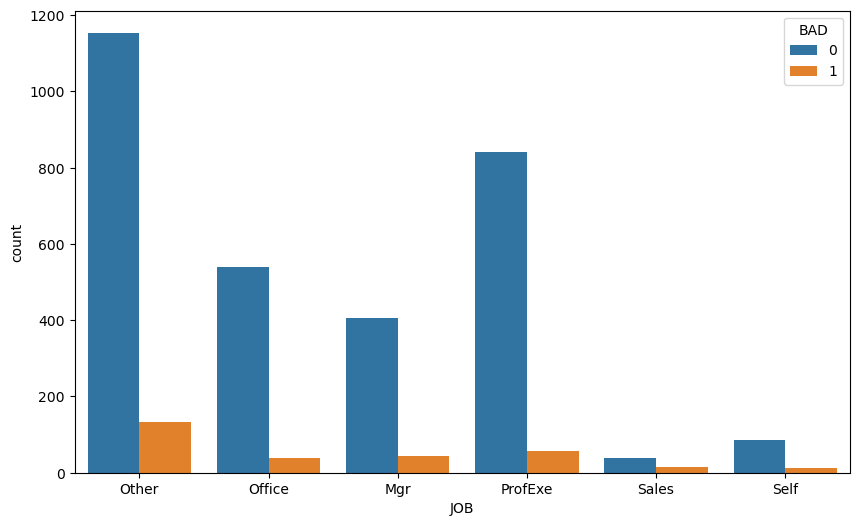

In [122]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'JOB', hue = 'BAD', data = data)

plt.show()

**We have explored different combinations of variables. Now, let's see the pairwise correlations between all the variables.**

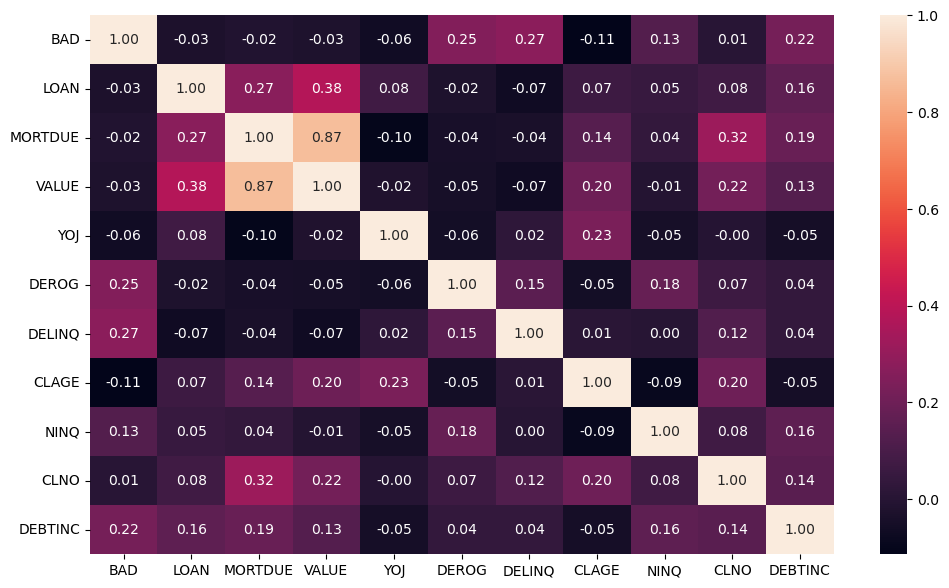

In [123]:
plt.figure(figsize = (12, 7))

sns.heatmap(data.corr(), annot = True, fmt = ".2f")

plt.show()

## **Preparing the data for modeling**

- Models cannot take non-numeric inputs. So, we will first create dummy variables for all the categorical variables.
- We will then split the data into train and test sets.

In [124]:
# Separating the target variable and other variables
X = data.drop(columns = 'BAD')
Y = data['BAD']

In [125]:
# Creating dummy variables, drop_first = True is used to avoid redundant variables
X = pd.get_dummies(X, drop_first = True)

In [126]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, 
                                                    test_size = 0.30, 
                                                    random_state = 1)

## **Building Classification Models**

**Before training the model, let's choose the appropriate model evaluation criterion as per the problem at hand.**

### **Model evaluation criterion**

**Model can make wrong predictions as:**

1. Predicting a customer will not default on their home mortgage loan.
2. Predicting a customer will default on their loan but in reality, the customer does not default on their loan. 

**Which case is more important?** 
* Both the cases are important as:

* If we predict that a loan will not default and does actually default, then the bank will lose resources and will have to bear lost revenues.

* If we predict that a loan default and the loan does not default, then the bank is possibly subject to legal action outline by the Equal Opportunities Act. This might damage the brand equity.


**How to reduce the losses?**

* The bank would want `F1 Score` to be maximized, greater the F1 score, higher are the chances of minimizing False Negatives and False Positives. 

In [127]:
# Function to print classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Canceled', 'Canceled'], yticklabels = ['Not Canceled', 'Canceled'])
    
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

### **Decision Tree**

In [128]:
# Fitting the decision tree classifier on the training data
d_tree =  DecisionTreeClassifier(random_state = 7)

d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=7)

**Let's check the performance on the training data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2151
           1       1.00      1.00      1.00       203

    accuracy                           1.00      2354
   macro avg       1.00      1.00      1.00      2354
weighted avg       1.00      1.00      1.00      2354



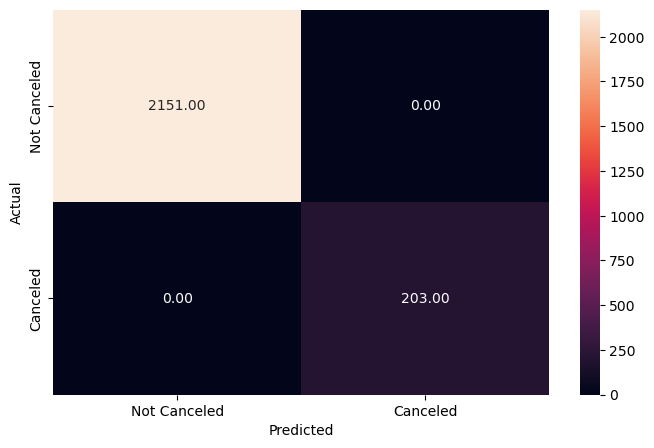

In [129]:
# Checking performance on the training data
y_pred_train1 = d_tree.predict(X_train)

metrics_score(y_train, y_pred_train1)

**Let's check the performance on test data to see if the model is overfitting.**

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       913
           1       0.68      0.49      0.57        97

    accuracy                           0.93      1010
   macro avg       0.81      0.73      0.77      1010
weighted avg       0.92      0.93      0.92      1010



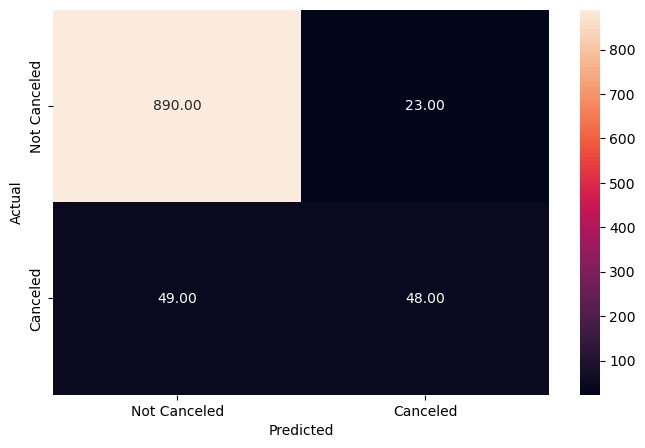

In [130]:
# Checking performance on the testing data
y_pred_test1 = d_tree.predict(X_test)

metrics_score(y_test, y_pred_test1)

### **Decision Tree - Hyperparameter Tuning**

We will use the class_weight hyperparameter with the value equal to {0: 0.3, 1: 0.7} which is **approximately** the opposite of the imbalance in the original data. 

**This would tell the model that 1 is the important class here.**

In [131]:
# Choose the type of classifier 
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - f1 score for class 1
scorer = metrics.make_scorer(f1_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=8,
                       min_samples_leaf=5, random_state=7)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2151
           1       0.75      0.69      0.72       203

    accuracy                           0.95      2354
   macro avg       0.86      0.84      0.85      2354
weighted avg       0.95      0.95      0.95      2354



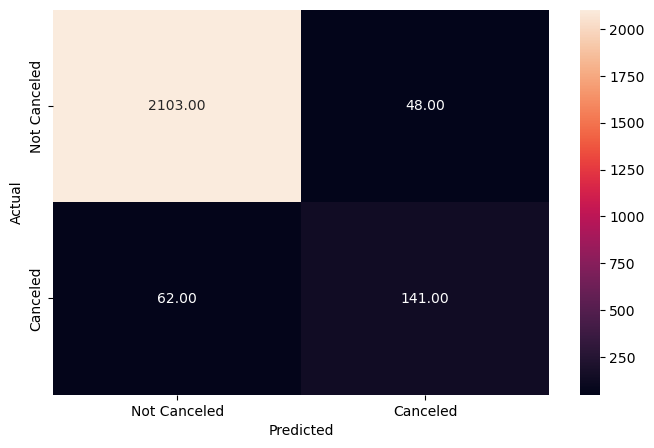

In [132]:
# Checking performance on the training data
y_pred_train2 = d_tree_tuned.predict(X_train)

metrics_score(y_train, y_pred_train2)

**Let's check the model performance on the testing data**

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       913
           1       0.45      0.35      0.39        97

    accuracy                           0.90      1010
   macro avg       0.69      0.65      0.67      1010
weighted avg       0.89      0.90      0.89      1010



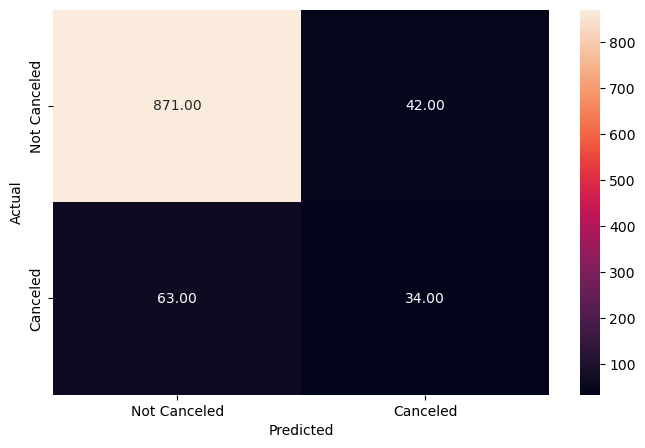

In [133]:
# Checking performance on the testing data
y_pred_test2 = d_tree_tuned.predict(X_test)

metrics_score(y_test, y_pred_test2)

**It is hard to visualize and interpret the tree with depth = 9, We can reduce the depth to 3 and visualize it**

In [134]:
tree_model = DecisionTreeClassifier(class_weight = {0: 0.3, 1: 0.7}, max_depth = 3,
                       min_samples_leaf = 5, random_state = 7)

# Fit the best algorithm to the data
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=3,
                       min_samples_leaf=5, random_state=7)

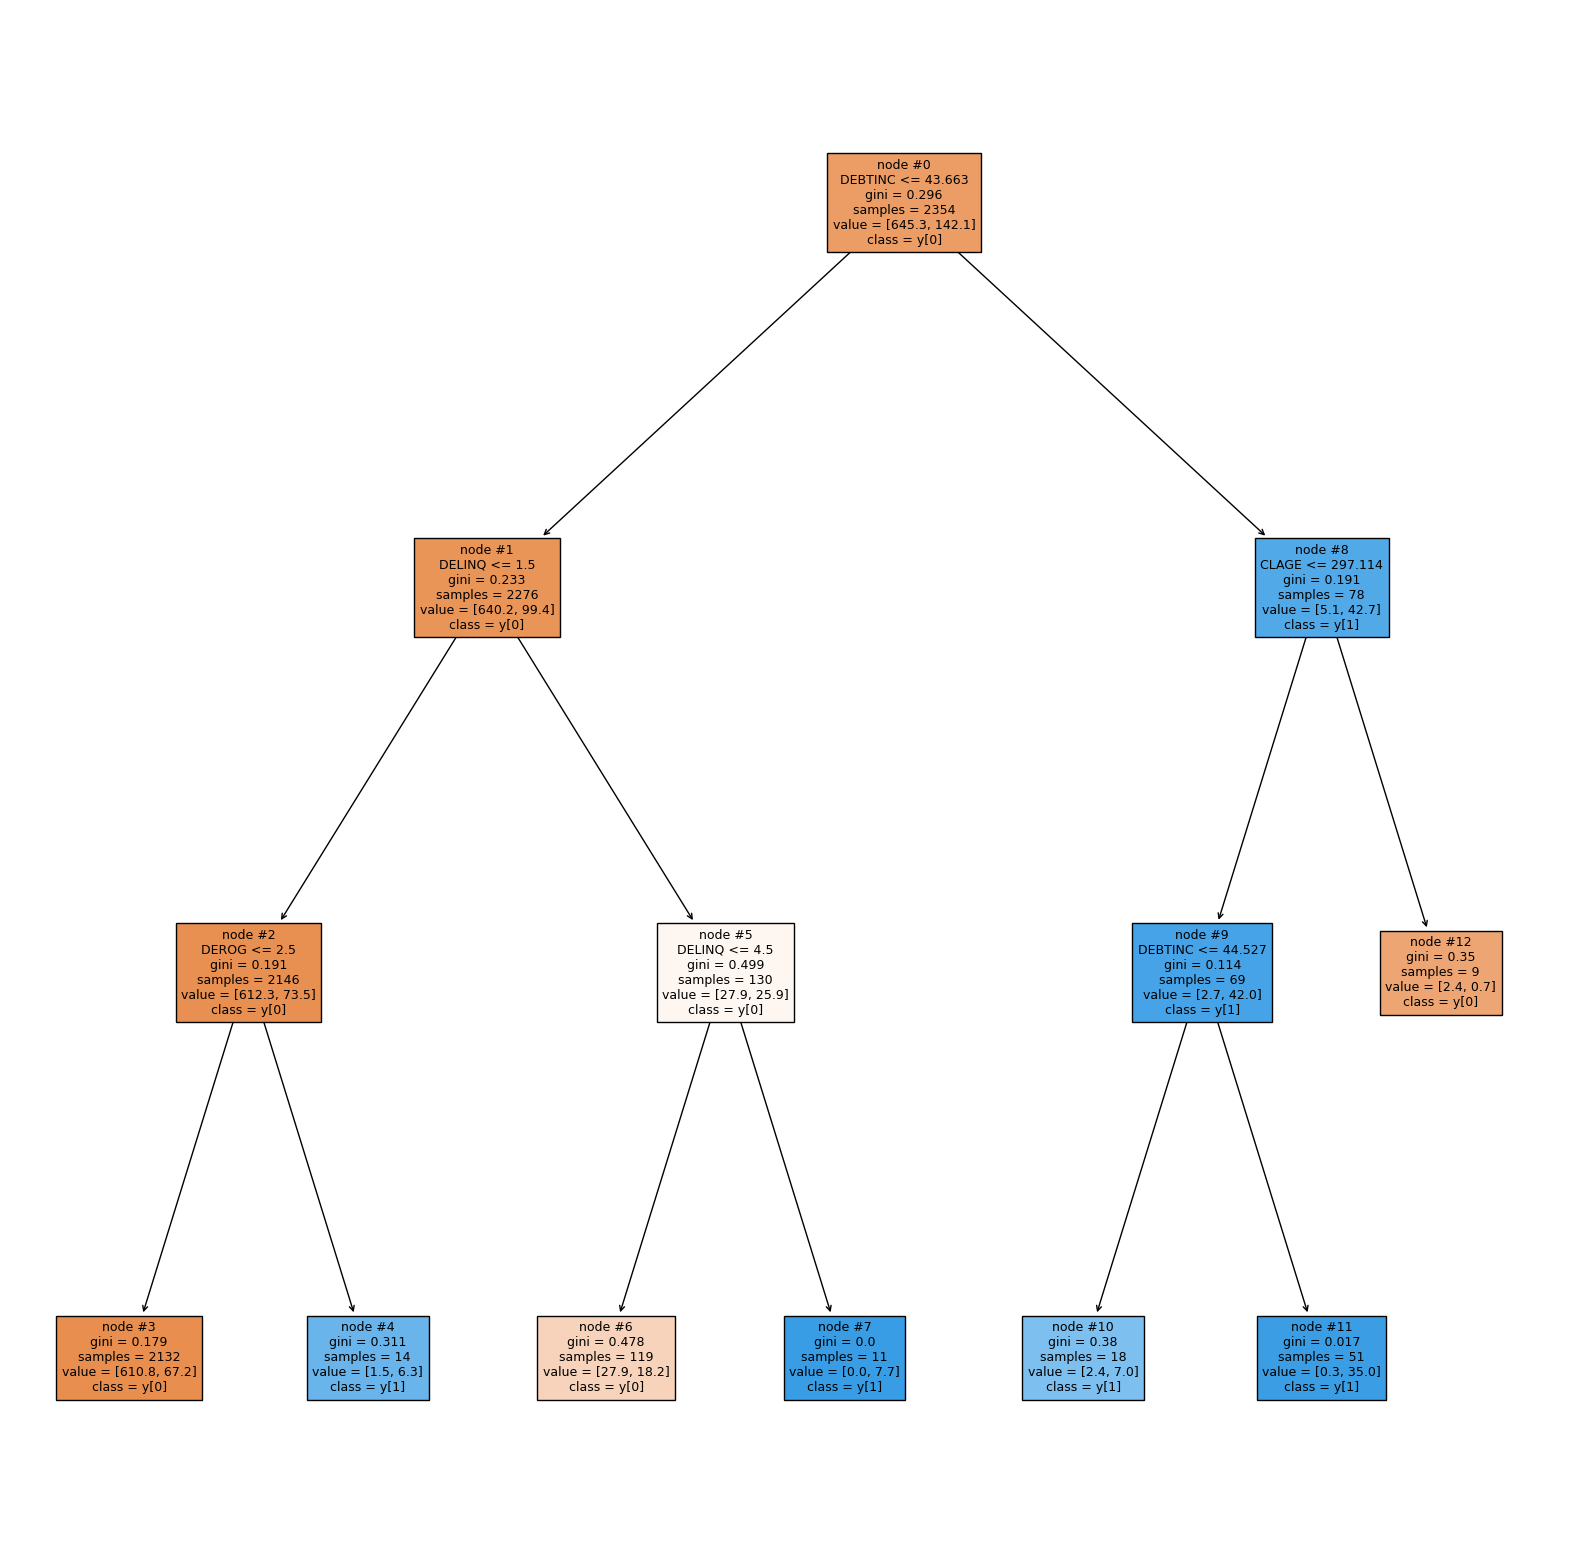

In [135]:
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(tree_model, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

**Note:** Blue leaves represent the loans that were about to default, i.e., **y[1]**, while the light orange leaves represent the laons that did not deault, i.e., **y[0]**. Also, the more the number of observations in a leaf, the darker its color gets.

In [136]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, 
                    columns = ["Imp"], 
                    index = X_train.columns).sort_values(by = 'Imp', 
                    ascending = False))

                         Imp
DEBTINC         4.638279e-01
DELINQ          1.386160e-01
CLAGE           9.117834e-02
CLNO            6.186836e-02
MORTDUE         6.163131e-02
LOAN            6.123604e-02
DEROG           5.707233e-02
VALUE           3.905737e-02
JOB_Sales       1.224774e-02
NINQ            7.930756e-03
YOJ             5.333942e-03
JOB_Other       5.796731e-16
REASON_HomeImp  0.000000e+00
JOB_Office      0.000000e+00
JOB_ProfExe     0.000000e+00
JOB_Self        0.000000e+00


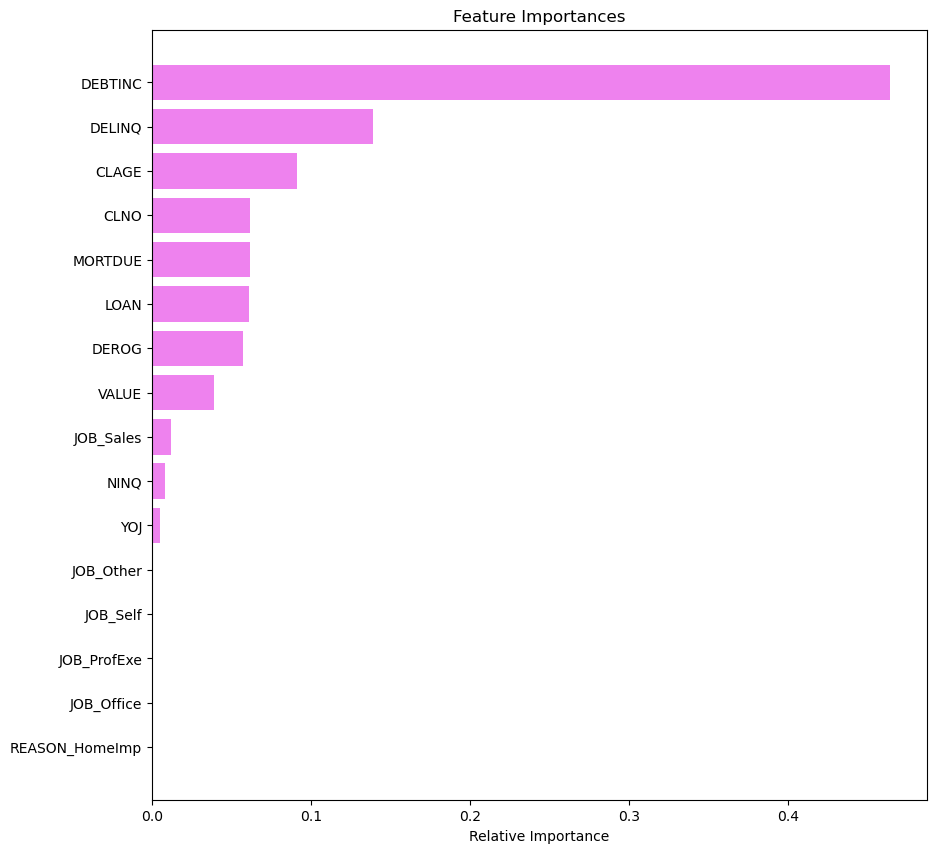

In [137]:
# Plotting the feature importance
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

### **Random Forest Classifier**

In [138]:
# Fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier(random_state = 7, criterion = "entropy")

rf_estimator.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=7)

**Let's check the performance of the model on the training data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2151
           1       1.00      1.00      1.00       203

    accuracy                           1.00      2354
   macro avg       1.00      1.00      1.00      2354
weighted avg       1.00      1.00      1.00      2354



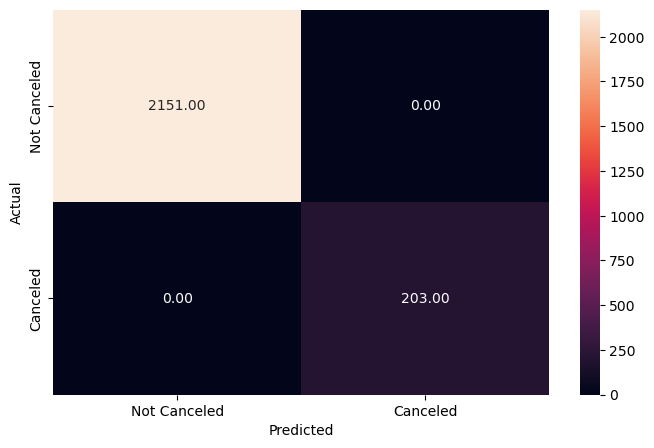

In [139]:
# Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train3)

**Let's confirm this by checking its performance on the testing data**

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       913
           1       1.00      0.31      0.47        97

    accuracy                           0.93      1010
   macro avg       0.97      0.65      0.72      1010
weighted avg       0.94      0.93      0.92      1010



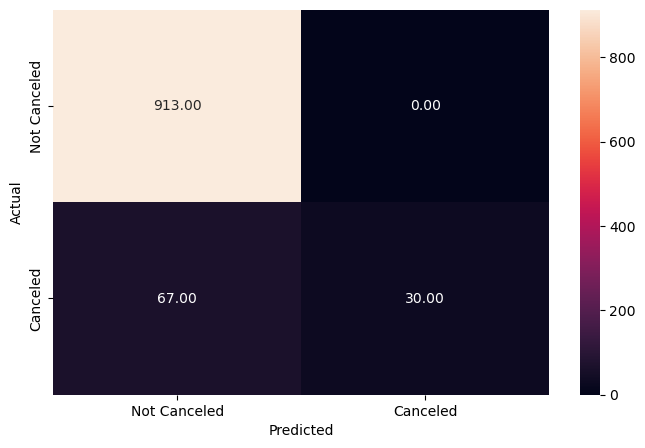

In [140]:
# Checking performance on the testing data
y_pred_test3 = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test3)

**Let's see if we can able to get a better model by tuning the random forest classifier**

### **Random Forest Classifier - Hyperparameter Tuning**

Let's try **tuning some of the important hyperparameters of the Random Forest Classifier**. 

We will **not** tune the `criterion` hyperparameter as we know from hyperparameter tuning for decision trees that `entropy` is a better splitting criterion for this data.

In [141]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [80, 90, 110],
    "max_depth": [5, 6, 7],
    "max_features": [0.8, 0.9, 1]
             }

# Type of scoring used to compare parameter combinations - f1 score for class 1
scorer = metrics.make_scorer(f1_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned_base = grid_obj.best_estimator_

In [142]:
# Fitting the best algorithm to the training data
rf_estimator_tuned_base.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features=0.8,
                       n_estimators=80, random_state=7)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2151
           1       1.00      0.50      0.67       203

    accuracy                           0.96      2354
   macro avg       0.98      0.75      0.82      2354
weighted avg       0.96      0.96      0.95      2354



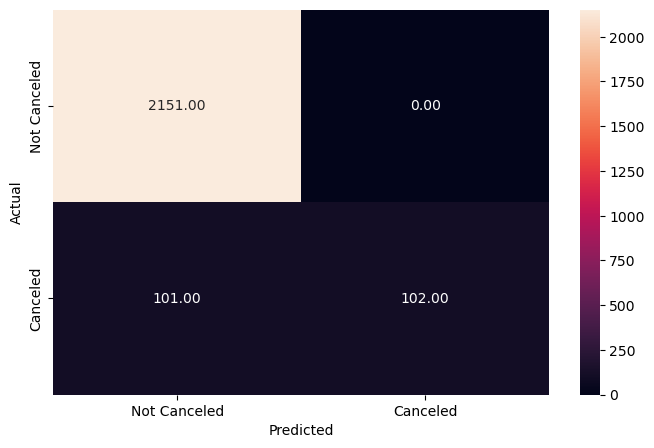

In [143]:
# Checking performance on the training data
y_pred_train4 = rf_estimator_tuned_base.predict(X_train)

metrics_score(y_train, y_pred_train4)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       913
           1       1.00      0.27      0.42        97

    accuracy                           0.93      1010
   macro avg       0.96      0.63      0.69      1010
weighted avg       0.93      0.93      0.91      1010



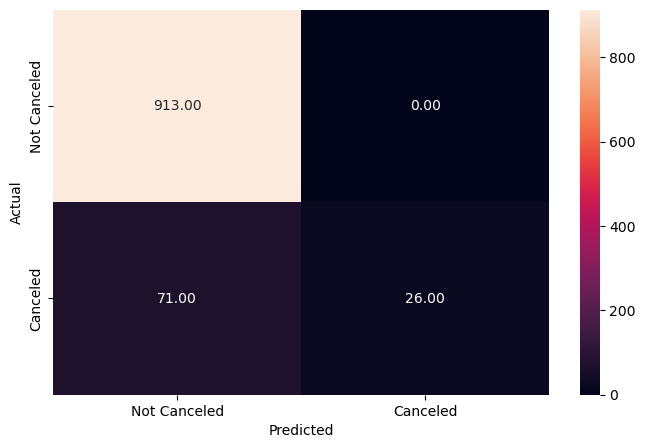

In [144]:
# Checking performance on the training data
y_pred_test4 = rf_estimator_tuned_base.predict(X_test)

metrics_score(y_test, y_pred_test4)

**Note:** **GridSearchCV can take a long time to run** depending on the number of hyperparameters and the number of values tried for each hyperparameter. **Therefore, we have reduced the number of values passed to each hyperparameter.** 

In [145]:
# Choose the type of classifier 
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight" : ["balanced",{0: 0.3, 1: 0.7}]
             }

# Type of scoring used to compare parameter combinations - f1 score for class 1
scorer = metrics.make_scorer(f1_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [146]:
# Fitting the best algorithm to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=20, n_estimators=120, random_state=7)

**Let's check the performance of the tuned model**

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      2151
           1       0.50      0.80      0.62       203

    accuracy                           0.91      2354
   macro avg       0.74      0.86      0.79      2354
weighted avg       0.94      0.91      0.92      2354



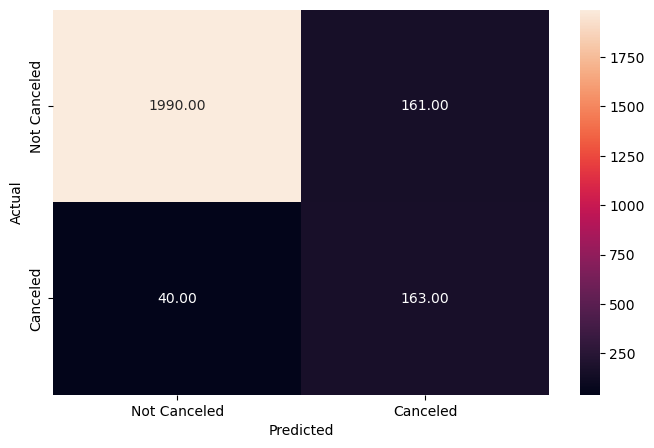

In [147]:
y_pred_train5 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train5)

**One of the drawbacks of ensemble models is that we lose the ability to obtain an interpretation of the model. We cannot observe the decision rules for random forests the way we did for decision trees. So, let's just check the feature importance of the model.**

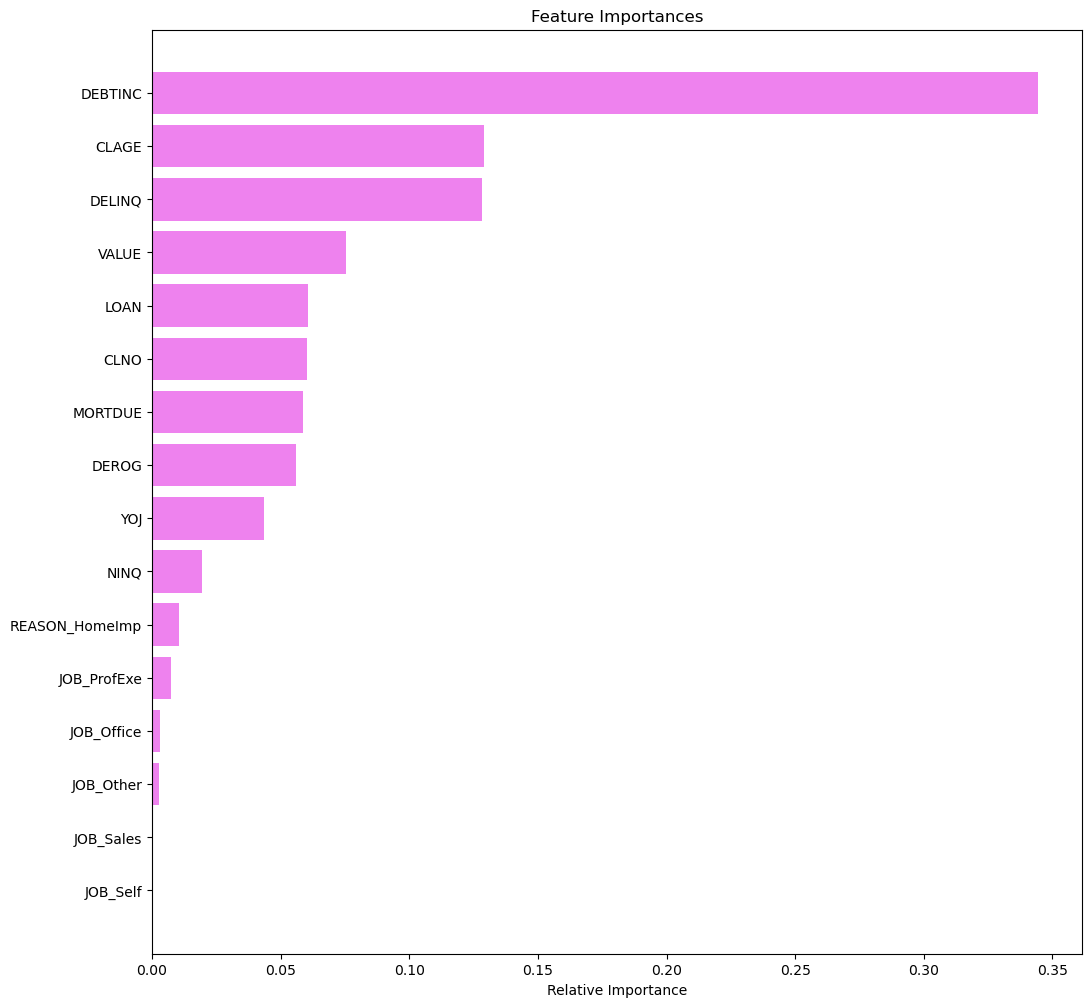

In [148]:
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

## **Conclusion:**

* We have been able to build tree-based models that can be used by the bank to predict the perpensity of a loan default and to stay within Equal Opportunity Act Guidelines.

* The random forest model is giving the highest F1 score of 91% and the macro average of 79% on the test data.

* Looking at important variables, based on the feature importances, we can say that the Debit-to-income ratio, age of the oldest credit line, and the number of delinquent credit lines are the major drivers of the model.

* The Decision tree model is highly overfitting the training data and gives an F1 score of 97% on the test data. The tuned Decision Tree model is very balanced and gives more generalized results on both training and testing data.

* Using the tuned random forest model which has a 91% F1 score with balanced precision and recall scores, the bank will be able to predict which loans will be and will not default.

## **Recommendations:**

1. We observed that the debt-to-income ratio to be the most telling variable in wheter a loan will default or not.  
    * The bank can set up guiderails and programs to assist customers being proactive in order to reduce their overall debt-to-income ratio. This comes with assistance and monitoring reduce overall risk overhead.
    
2. Delinquency of credit lines is a strong indicator that their is an opportunity for consolidation